## Метод наименьших квадратов

Вариант 18 

$$ x_{i} = 0.0, 1.7, 3.4, 5.1, 6.8, 8.5 $$

$$ y_{i} = 0.0, 3.0038, 5.2439, 7.3583, 9.4077, 11.415 $$

для $$i = 0, 1, 2, 3, 4, 5$$ соответственно

In [2]:
x_arr = [0.0, 1.7, 3.4, 5.1, 6.8, 8.5]
y_arr = [0.0, 3.0038, 5.2439, 7.3583, 9.4077, 11.415]

 Используем design matrix.

In [3]:
import numpy as np

def design_matrix(x, m):
    n = len(x)
    D = np.zeros((n, m+1)) 
    for i in range(n):
        for j in range(m+1):
            D[i][j] = x[i]**j
    return D
    

С помощью этой функции мы можем строить матрицы для аппроксимации многочленами разного порядка m.

In [4]:
x_test = [1,2,3,4, 5]
D = design_matrix(x_test, 3)
D

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

Построим многочлен 1-го порядка:

In [5]:
D = design_matrix(x_arr, 1)
A = D.T @ D
b = D.T @ y_arr
beta = np.linalg.solve(A, b)
poly = lambda x: beta[0] + beta[1]*x
print("Приближающий многочлен первой степени: " + str(beta[0]) + "*x + " + str(beta[1]))

Приближающий многочлен первой степени: 0.4713714285714274*x + 1.3176655462184876


Посчитаем для него сумму квадратов ошибок:

In [6]:
n = len(y_arr)
summ = 0
for i in range(n):
    summ += (poly(x_arr[i]) - y_arr[i])**2
print("Сумма квадратов ошибок: ", summ)

Сумма квадратов ошибок:  0.48743019771428586


Построим многочлен 2-го порядка:

In [122]:
D2 = design_matrix(x_arr, 2)
A2 = D2.T @ D2
b2 = D2.T @ y_arr
beta2 = np.linalg.solve(A2, b2)
poly2 = lambda x: beta2[0] + beta2[1]*x + beta2[2]*(x**2)
print("Приближающий многочлен второй степени: " + str(beta2[0]) + "*x^2 + " + str(beta2[1]) + "*x " + str(beta2[2]))

Приближающий многочлен второй степени: 0.12938928571427327*x^2 + 1.6194144957983274*x -0.03549987642115758


Посчитаем для него сумму квадратов ошибок:

In [123]:
n = len(y_arr)
summ = 0
for i in range(n):
    summ += (poly2(x_arr[i]) - y_arr[i])**2
print("Сумма квадратов ошибок: ", summ)

Сумма квадратов ошибок:  0.0944721966428572


(0.0, 12.0)

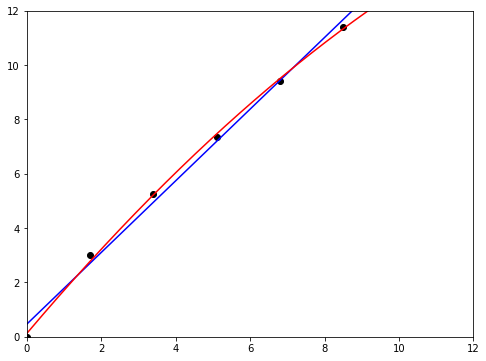

In [124]:
import matplotlib.pyplot as plt

x_full = np.arange(0.0, 12, 0.01)
p1_vals = [poly(x_i) for x_i in x_full]
p2_vals = [poly2(x_i) for x_i in x_full]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_full, p1_vals , color = 'blue')
ax.plot(x_full, p2_vals, color = 'red')
ax.scatter(x_arr, y_arr, color = 'black')
plt.ylim(0, 12)  
plt.xlim(0, 12)

На примере многочлена 1-й степени проверим, что мы правильно посчитали коэффициенты $\beta$ - решим нормальную систему, вручную считая коэффициенты.

In [106]:
N = len(x_arr) - 1
summ_x_y = 0
summ_x_2 = 0
summ_y = 0
summ_x = 0
for x_i, y_i in zip(x_arr, y_arr):
    summ_x_y += x_i*y_i
    summ_x_2 += (x_i)**2
    summ_y += y_i
    summ_x += x_i

In [8]:
A = np.array([N+1, summ_x, summ_x, summ_x_2])
A = A.reshape((2,2))
b = np.array([summ_y, summ_x_y])
xb = np.linalg.solve(A, b)
print("Вручную: " + str(xb) + ", с использованием design matrix: " + str(beta))

NameError: name 'N' is not defined